## Telecom Churn Data set
The following data set contains coustomer data and their churn status. The predictice model to be build to predict if a customer would churn from the model. Import the data from the csv file TelcoChurn

In [2]:
import pandas as pd
df=pd.read_csv('TelcoChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic EDA of the data set


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
## Dropping the ID type variables
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
#Dividing the data set into independant(Categorical,Continuous) and dependant variable
df_cat=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']].copy()
df_num=df[['MonthlyCharges','TotalCharges']].copy()
df_Y=df[['Churn']].copy()

## EDA and Feature engineering

In [6]:
df_cat['SeniorCitizen'] = df_cat['SeniorCitizen'].astype('object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  Contract          7043 non-null   object
 12  PaperlessBilling  7043 non-null   object
 13  PaymentMethod     7043 non-null   object
dtypes: object(14)
memory usage: 770.5+ KB


## Performing Chi square
H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.
In the above example, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other.
This means, if two variables are correlated, then the P-value will come very close to zero.

In [7]:
from scipy.stats import chi2_contingency
for i in range (13):
    CrosstabResult=pd.crosstab(index=df_Y['Churn'],columns=df_cat.iloc[:,i])
    print('\n',CrosstabResult)
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


 gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
The P-Value of the ChiSq Test is: 0.48657873605618596

 SeniorCitizen     0    1
Churn                   
No             4508  666
Yes            1393  476
The P-Value of the ChiSq Test is: 1.510066805092378e-36

 Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
The P-Value of the ChiSq Test is: 2.1399113440759935e-36

 Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
The P-Value of the ChiSq Test is: 4.9249216612154196e-43

 PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
The P-Value of the ChiSq Test is: 0.3387825358066928

 MultipleLines    No  No phone service   Yes
Churn                                      
No             2541               512  2121
Yes             849               170   850
The P-Value of the ChiSq Test is: 0.0034643829548773003

 InternetService   DSL  Fi

From the Chi Sq values we find that 'PhoneService', 'gender' are the two features whose P value is greater than 0.005 hence 
the H0 is accepted in these cases.We will drop these two features.

In [8]:
df_cat.drop(['PhoneService', 'gender'],axis=1,inplace=True)

## Outlier detection and imputation in continious data

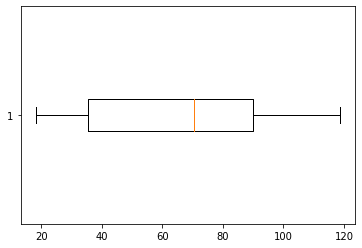

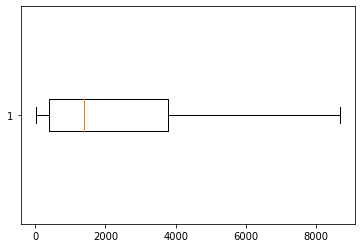

In [13]:
import matplotlib.pyplot as plt
for i in range(2):
    plt.boxplot(df_num.iloc[:,i],vert=0)
    plt.show()

No outlier present in the data. Since it is a classification problem we will convert the continuous data into
range bins.

In [14]:
df_num.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.798992
std,30.090047,2266.730170
min,18.250000,18.800000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


In [15]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
df_num_bin=pd.DataFrame(discrete.fit_transform(df_num),index=df_num.index, columns=df_num.columns).add_suffix('_Rank')
df_num_bin.head()

,MonthlyCharges_Rank,TotalCharges_Rank
0,2.0,0.0
1,3.0,5.0
2,3.0,1.0
3,2.0,5.0
4,5.0,1.0


## Joining the numerical and categorical data to get the final independant features

In [16]:
X_all=pd.concat([df_cat,df_num_bin],axis=1,join='inner')
X_all.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_Rank,TotalCharges_Rank
0,0,Yes,No,No phone service,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,2.0,0.0
1,0,No,No,No,DSL,Yes,Yes,No,No,One year,No,Mailed check,3.0,5.0
2,0,No,No,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,3.0,1.0
3,0,No,No,No phone service,DSL,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),2.0,5.0
4,0,No,No,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,5.0,1.0


In [17]:
X_all_dum = pd.get_dummies(X_all, drop_first = True)
X_all_dum.head()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,MonthlyCharges_Rank,TotalCharges_Rank,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.0,0.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3.0,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2.0,5.0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5.0,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all_dum,df_Y, test_size=0.3, random_state=10)

## Predict_Decision tree Model
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()
param_DT = {'criterion': ['gini', 'entropy'], 'max_depth': [5,6,7],'min_samples_split':[10,20,30]}
grid = GridSearchCV(estimator=dtree,cv=5,param_grid=param_DT,verbose=True)
grid.fit(X_train, y_train)
print('Training accuracy of the model:  ',grid.score(X_train, y_train))
print('Testing accuracy of the model:  ',grid.score(X_test, y_test))
print('Best parameters for CV search:  ',(grid.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training accuracy of the model:   0.8016227180527383
Testing accuracy of the model:   0.791292001893043
Best parameters for CV search:   {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 20}


## Predict_Randomforest_Bagging
sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [20]:
from sklearn.ensemble import BaggingClassifier
bg_class=BaggingClassifier()
param_DT = {'n_estimators': [3,5,7,9,11,13,15,17],'max_features':[7,9,11,13,15]}
grid = GridSearchCV(estimator=bg_class,cv=5,param_grid=param_DT,verbose=True)
grid.fit(X_train, y_train)
print('Training accuracy of the model:  ',grid.score(X_train, y_train))
print('Testing accuracy of the model:  ',grid.score(X_test, y_test))
print('Best parameters for CV search:  ',(grid.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConve

Training accuracy of the model:   0.8139959432048681
Testing accuracy of the model:   0.7813535257927118
Best parameters for CV search:   {'max_features': 9, 'n_estimators': 17}


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predict_Gradientboost
sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
GVM_class=GradientBoostingClassifier()
param_DT = {'learning_rate':[0.01,0.03,0.05],'n_estimators':[70,80,110],'min_samples_split':[2,3,4],'max_depth':[3,5,7]}
grid = GridSearchCV(estimator=GVM_class,cv=5,param_grid=param_DT,verbose=True)
grid.fit(X_train, y_train)
print('Training accuracy of the model:  ',grid.score(X_train, y_train))
print('Testing accuracy of the model:  ',grid.score(X_test, y_test))
print('Best parameters for CV search:  ',(grid.best_params_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Training accuracy of the model:   0.8208924949290061
Testing accuracy of the model:   0.8035967818267865
Best parameters for CV search:   {'learning_rate': 0.03, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 110}


In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred),pos_label='Y')
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

In [ ]:
## Summery
After fitting the model with different algorithms we find that Gradient boosting algo is giving the beat accuracy.